# Udacity Data Analyst Professinal Nanodegree - <br> Project "Data Wrangling and Analyzing"
### by Mohamed Awwad

## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gather)
- [Assessing data](#assess)
- [Cleaning data](#clean)
- [Storing, Analyzing, and Visualizing](#storing)

<a id='intro'></a>
## Introduction

Using Python and its libraries, I will gather data from three sources, assess its quality and tidiness, then clean it.<br>
The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 


<a id='gather'></a>
## Gathering data

**1. Twitter archive file**

The file "twitter_archive_enhanced.csv" downloaded manually from Udacity resources    

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from functools import reduce
from datetime import datetime
import tweepy 
import json 
import re
import seaborn as sns
plt.rcParams["figure.figsize"] = [12, 9]


In [2]:
# load twitter archive
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
# use tweet id column as index
twitter_archive.set_index("tweet_id", inplace = True)
# display few lines
twitter_archive.head()


,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**2. Tweet image prediction**

**The tweet image predictions**:
i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [3]:
#URL downloaded programatically 
# get file with the image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv' ,mode ='wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)


In [4]:
# load image predictions
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
# use tweet id column as index
image_prediction.set_index("tweet_id", inplace = True)
# display few lines
image_prediction.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. Twitter API File**

Twitter API file contains tweet id, favorite count and retweet count. Data was provided by Udacity, downloaded manually then will be loaded from the tweet-json.txt file into a pandas data frame

In [5]:
# load twitter API data
tweets_data = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
         try:
                tweet = json.loads(line)
                tweets_data.append(tweet)
         except:
             continue

# Create a DataFrame with tweet ID, retweet count, favorite count
twitter_API_data = pd.DataFrame(tweets_data, columns = ['id', 'retweet_count', 'favorite_count'])


In [6]:
# display few lines
twitter_API_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assess'></a>
## Assessing Data
Assess data visually as well as programmatically using pandas for quality and tidiness issues.<br>
Inspecting the dataset for two things: data quality issues (i.e. content issues) and lack of tidiness (i.e. structural issues).

#### Dataset 1 - twitter_archive
Visual Inspection of twitter archive

In [7]:
twitter_archive

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [8]:
# Explor a summary of the DataFrame
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   in_reply_to_status_id       78 non-null     float64
 1   in_reply_to_user_id         78 non-null     float64
 2   timestamp                   2356 non-null   object 
 3   source                      2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  fl

In [9]:
twitter_archive.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# check if ids are unique
twitter_archive.index.is_unique

True

In [11]:
# chacking for duplicay 
sum(twitter_archive.duplicated())

0

In [12]:
# check number of replies
np.isfinite(twitter_archive.in_reply_to_status_id).sum()

78

In [13]:
# check number of retweets
np.isfinite(twitter_archive.retweeted_status_id).sum()

181

In [14]:
# check name of dog
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Peanut       1
Lipton       1
Dex          1
Holly        1
Chubbs       1
Name: name, Length: 957, dtype: int64

In [15]:
twitter_archive

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [16]:
# check rating denominator
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
# check ratings with denominator greather than 10
twitter_archive[twitter_archive.rating_denominator > 10]['rating_denominator'].value_counts().sum()

20

In [18]:
# Sort by rating denominator values
twitter_archive.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [19]:
# check rating numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
# Are there any ratings using decimal numbers?
twitter_archive[twitter_archive['text'].str.contains(r'(\d+\.\d+\/\d+)')]

c:\users\moham\anaconda3\envs\db\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [21]:
# check expanded urls
twitter_archive[~twitter_archive.expanded_urls.str.startswith(('https://twitter.com','http://twitter.com', 'https://vine.co'), na=False)].sample(3)[['text','expanded_urls']]

,text,expanded_urls
tweet_id,,
704491224099647488,13/10 hero af\n@ABC,NaN
828361771580813312,Beebop and Doobert should start a band 12/10 w...,NaN
821153421864615936,@imgur for a polar bear tho I'd say 13/10 is a...,NaN


In [22]:
# check for two or more urls in the expanded urls
twitter_archive[twitter_archive.expanded_urls.str.contains(',', na = False)].expanded_urls.count()


639

#### Quality & Tidiness Issues in twitter_archive

#### Quality
- in_reply_to_status_id , "in_reply_to_user_id" , retweeted_status_id , retweeted_status_user_id has wrong data types
- timestamp and retweeted_status_timestamp are not a datetime format
- 128 retweets are present in the data
- 78 reples are present in the data
- rating_denominator column has 20 values other than 10
- rating_numerators are not always correctly accounting for decimals
- rating_numerator column has values less than 10 as well as some very large numbers (e.g. 1176)
- the dog names are not standardized
- name column: none appears 745 (missing data but not NaN)
- name column: some names are false (O, a, not..)
- unnecessary html tags in source column in place of utility name e.g. <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>
- pupper, puppo, floofer and doggo columns: For 1976 IDs there are no dog "stage" information.
- we have 639 expanded urls which contain more than one url address.

#### Tidyness
- source and expanded_urls have several informations inside them
- pupper, puppo, floofer and doggo columns should be merged into one column 
- retweet columns not needed 

#### Dataset 2 - image_predicition
Visual Inspection of twitter archive

In [23]:
# display image predicition data
image_prediction

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...
891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [24]:
image_prediction.shape

(2075, 11)

In [25]:
# print a summary of a DataFrame
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   jpg_url  2075 non-null   object 
 1   img_num  2075 non-null   int64  
 2   p1       2075 non-null   object 
 3   p1_conf  2075 non-null   float64
 4   p1_dog   2075 non-null   bool   
 5   p2       2075 non-null   object 
 6   p2_conf  2075 non-null   float64
 7   p2_dog   2075 non-null   bool   
 8   p3       2075 non-null   object 
 9   p3_conf  2075 non-null   float64
 10  p3_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [26]:
image_prediction.img_num.unique()

array([1, 4, 2, 3], dtype=int64)

In [27]:
# Check jpg_url for duplicates
sum(image_prediction.jpg_url.duplicated())

66

In [28]:
# check jpg_url to confirm if it contains only jpg and png images
image_prediction[~image_prediction.jpg_url.str.endswith(('.jpg', '.png'), na = False)].jpg_url.count()

0

In [29]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [30]:
# check 1st prediction
image_prediction.p1.sample(3)

tweet_id
667937095915278337             hamster
713900603437621249    golden_retriever
666033412701032449     German_shepherd
Name: p1, dtype: object

In [31]:
# check dog predictions
image_prediction.p1_dog.count()

2075

#### Quality & Tidiness Issues in Image Predictions

#### Quality

- the dataset has 2075 entries, while twitter archive dataset has 2356 entries.
- "tweet_id" is int, should be type object as no calculation is needed
- 66 jpg_url duplicates were found.
- column names are confusing and do not give much information about the content.
- dog breeds contain underscores, and have different case formatting.
- only 2075 images have been classified as dog images for top prediction.


#### Tidiness
- the dog breed prediction could be merged into one column (breed_prediction)
- the prediction confidence could be merged into one column (prediction_confidence)
- dataset should be merged with the twitter archive dataset.

#### Dataset 3 -Twitter API Data
Visual Inspection of twitter archive

In [32]:
twitter_API_data

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [33]:
# print a summary of a DataFrame
twitter_API_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [34]:
# check if ids are unique
sum(twitter_API_data.duplicated()==True)

0

#### Quality & Tidiness Issues in Twitter API Data

#### Quality
- tweet_id is int, should be type object as no calculation is needed
- twitter archive dataset has2356 entries, while twitter API data has 2356.
- (2356-2356) =20 missing IDs

#### Tidiness
- 2 columns retweet_count and favorite_count should be joined with the twitter archive dataset.

<a id='clean'></a>
## Cleaning Data

Using pandas, clean the quality and tidiness issues identified in the Assessing Data section.

#### Clean: 1.Twitter Archive Data


In [35]:
# create a copy of twitter archive dataset
twitter_archive_clean = twitter_archive.copy()

In [36]:
# display twitter_archive_clean data
twitter_archive_clean

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


### Define
1.Remove retweets data from the dataset


In [37]:
# drop retweets                                                 
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

### Test

In [38]:
len(twitter_archive_clean[twitter_archive_clean['retweeted_status_id'] == False])

0

### Define
2.Drop retweet and replay columns <br>
retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id

In [39]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

c:\users\moham\anaconda3\envs\db\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Test

In [40]:
twitter_archive_clean

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


### Define

3.Convert timestamp columns to date


In [41]:
# convert to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

c:\users\moham\anaconda3\envs\db\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Test

In [42]:
# display dataset types
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2175 non-null   datetime64[ns, UTC]
 1   source              2175 non-null   object             
 2   text                2175 non-null   object             
 3   expanded_urls       2117 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 203


### Define

4.Replace all faulty names to none


In [43]:
twitter_archive_clean[twitter_archive_clean.name.str.islower()==True]['name'].unique()


array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [44]:
faulty_name = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'] 
for name in faulty_name:
    twitter_archive_clean.name.replace(name, 'None',inplace=True)

c:\users\moham\anaconda3\envs\db\lib\site-packages\pandas\core\series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


### Test 

In [45]:
twitter_archive['name'].value_counts()


None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Peanut       1
Lipton       1
Dex          1
Holly        1
Chubbs       1
Name: name, Length: 957, dtype: int64

In [46]:
twitter_archive_clean['name'].value_counts()


None        784
Charlie      11
Lucy         11
Oliver       10
Cooper       10
           ... 
Bronte        1
Dudley        1
Snickers      1
Meyer         1
Chubbs        1
Name: name, Length: 931, dtype: int64

### Define

5.Create the "dog_stage" column by combining columns "doggo", "floofer", "pupper" and "puppo" 


In [47]:
len(twitter_archive_clean[((twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.pupper != 'None'))
                  | ((twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.floofer != 'None')) 
                  | ((twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.puppo != 'None'))])

12

In [48]:
twitter_archive_clean['pupper'][(twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.pupper != 'None')] = 'None'
twitter_archive_clean['doggo'][(twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.puppo  != 'None')] = 'None'
twitter_archive_clean['doggo'][(twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.floofer  != 'None')] = 'None'

c:\users\moham\anaconda3\envs\db\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\moham\anaconda3\envs\db\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
c:\users\moham\anaconda3\envs\db\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [49]:
len(twitter_archive_clean[((twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.pupper != 'None'))
                  | ((twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.floofer != 'None')) 
                  | ((twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.puppo != 'None'))])

0

In [50]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

c:\users\moham\anaconda3\envs\db\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Test

In [51]:
twitter_archive_clean['dog_stage'].value_counts()

None       1831
pupper      224
doggo        85
puppo        25
floofer      10
Name: dog_stage, dtype: int64

In [52]:
# drop the columns
twitter_archive_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

c:\users\moham\anaconda3\envs\db\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,



### Define
6.Recorrect links by using tweet id


In [53]:
# fix expanded urls
for index, column in twitter_archive_clean.iterrows():
    twitter_archive_clean.loc[index, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(index)
    


c:\users\moham\anaconda3\envs\db\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


### Test

In [54]:
# Test
twitter_archive_clean

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
tweet_id,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
...,...,...,...,...,...,...,...,...
666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None
666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None
666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None


### Define
7.Strip all html anchor tags (i.e. `<a..></a>`) in source column and retain just the text in between the tags.<br>
Convert the datatype from string to categorical.

In [55]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

c:\users\moham\anaconda3\envs\db\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

c:\users\moham\anaconda3\envs\db\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Test

In [57]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [58]:
twitter_archive_clean

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
tweet_id,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
...,...,...,...,...,...,...,...,...
666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None
666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None
666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None


#### Clean: 2. image predicition


In [59]:
# create a copy of dataset
image_prediction_clean = image_prediction.copy()

In [60]:
# display current labels
image_prediction_clean.columns

Index(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### Define
1.Change column names to more descriptive ones.

In [61]:
# change labels
image_prediction_clean.columns = ['image_url', 
                            'img_number', 
                            '1st_prediction',
                            '1st_prediction_confidence',
                            '1st_prediction_dog',
                            '2nd_prediction',
                            '2nd_prediction_confidence',
                            '2nd_prediction_dog',
                            '3rd_prediction',
                            '3rd_prediction_confidence',
                            '3rd_prediction_dog']

#### Test


In [62]:
# display current labels
image_prediction_clean.columns

Index(['image_url', 'img_number', '1st_prediction',
       '1st_prediction_confidence', '1st_prediction_dog', '2nd_prediction',
       '2nd_prediction_confidence', '2nd_prediction_dog', '3rd_prediction',
       '3rd_prediction_confidence', '3rd_prediction_dog'],
      dtype='object')

#### Define
2.Dog breeds contain underscores, and have different case formatting

In [63]:
# columns with dog breed
dog_breed_cols = ['1st_prediction', '2nd_prediction', '3rd_prediction']

# remove underscore and capitalize the first letter of each word 
for column in dog_breed_cols:
    image_prediction_clean[column] = image_prediction_clean[column].str.replace('_', ' ')
    image_prediction_clean[column] = image_prediction_clean[column].str.title()

#### Test


In [64]:
# display sample of changes
image_prediction_clean[dog_breed_cols]

,1st_prediction,2nd_prediction,3rd_prediction
tweet_id,,,
666020888022790149,Welsh Springer Spaniel,Collie,Shetland Sheepdog
666029285002620928,Redbone,Miniature Pinscher,Rhodesian Ridgeback
666033412701032449,German Shepherd,Malinois,Bloodhound
666044226329800704,Rhodesian Ridgeback,Redbone,Miniature Pinscher
666049248165822465,Miniature Pinscher,Rottweiler,Doberman
...,...,...,...
891327558926688256,Basset,English Springer,German Short-Haired Pointer
891689557279858688,Paper Towel,Labrador Retriever,Spatula
891815181378084864,Chihuahua,Malamute,Kelpie


#### Define

3.Drop 66 image_url duplicated




In [65]:
#disply image_url duplicates 
sum(image_prediction_clean.image_url.duplicated())

66

In [66]:
#Delete duplicated image_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['image_url'], keep='last')


#### Test


In [67]:
sum(image_prediction_clean['image_url'].duplicated())

0

#### Define
4.Create a new colum (breed_prediction) for the predicted dog breed (if the first prediction wasn't a dog breed, take the second and so on) and the confidence of the prediction as a second column


In [68]:
# write a function that extracts the first dog breed prediction from the predictions DataFrame
def breed(row):
    if row['1st_prediction_dog']:
        return(row['1st_prediction'])
    elif row['2nd_prediction_dog']:
        return(row['2nd_prediction'])
    elif row['3rd_prediction_dog']:
        return(row['3rd_prediction'])
    else:
        return(np.NaN)
    
# write a function that extracts the confidence for the first dog breed prediction from the predictions DataFrame
def confidence(row):
    if row['1st_prediction_dog']:
        return(row['1st_prediction_confidence'])
    elif row['2nd_prediction_dog']:
        return(row['2nd_prediction_confidence'])
    elif row['3rd_prediction_dog']:
        return(row['3rd_prediction_confidence'])
    else:
        return(np.NaN)

In [69]:
# apply the breed function to the clean DataFrame to create a new column 'breed_prediction'
image_prediction_clean['breed_prediction'] = image_prediction_clean.apply (lambda row: breed (row),axis=1)

# apply the confidence function to the clean DataFrame to create a new column 'prediction_confidence'
image_prediction_clean['prediction_confidence'] = image_prediction_clean.apply (lambda row: confidence(row),axis=1)

#### Test

In [70]:
image_prediction_clean

,image_url,img_number,1st_prediction,1st_prediction_confidence,1st_prediction_dog,2nd_prediction,2nd_prediction_confidence,2nd_prediction_dog,3rd_prediction,3rd_prediction_confidence,3rd_prediction_dog,breed_prediction,prediction_confidence
tweet_id,,,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True,Welsh Springer Spaniel,0.465074
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True,Redbone,0.506826
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German Shepherd,0.596461
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True,Rhodesian Ridgeback,0.408143
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher,0.560311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,Basset,0.555712
891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,Labrador Retriever,0.168086
891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,Chihuahua,0.716012


In [71]:
columns = ['1st_prediction',
           '1st_prediction_confidence',
           '1st_prediction_dog',
           '2nd_prediction',
           '2nd_prediction_confidence',
           '2nd_prediction_dog',
           '3rd_prediction',
           '3rd_prediction_confidence',
           '3rd_prediction_dog']
image_prediction_clean.drop(columns, axis =1, inplace=True)

In [72]:
image_prediction_clean

,image_url,img_number,breed_prediction,prediction_confidence
tweet_id,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311
...,...,...,...,...
891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712
891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086
891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012


#### Clean: 3. Twitter API File


#### Define
1.Change column names to more descriptive ones.

In [73]:
# display current labels
twitter_API_data.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

In [74]:
# change labels
twitter_API_data.columns = ['tweet_id', 
                            'retweet', 
                            'favorite']


#### Test


In [75]:
twitter_API_data.columns

Index(['tweet_id', 'retweet', 'favorite'], dtype='object')

In [76]:
twitter_API_data

,tweet_id,retweet,favorite
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


#### Define

2.Merge the three datasets using inner merge (to get a dataframe only for matching IDs) 

In [77]:
# merge twitter_archive_clean with predictions_clean
complete_df = pd.merge(twitter_archive_clean, image_prediction_clean, how = 'inner', on = ['tweet_id']).copy()

# merge complete_df with twitter_add_info_clean
complete_df = pd.merge(complete_df, twitter_API_data, how = 'inner', on = ['tweet_id']).copy()

complete_df_clean = complete_df.copy()

#### Test

In [78]:
complete_df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,image_url,img_number,breed_prediction,prediction_confidence,retweet,favorite
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,41,111
1924,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,147,311
1925,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,47,128
1926,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,48,132


In [79]:
# checking for duplicates
complete_df_clean['tweet_id'].duplicated().any()

False

#### Define
3.Change Tweet_id int to str (object)

In [80]:
complete_df_clean['tweet_id'] = complete_df_clean['tweet_id'].astype('str')

#### Test 

In [81]:
complete_df_clean['tweet_id'].dtype 

dtype('O')

#### Define
4.Create a new column for the rating of (rating_numerator / rating_denominator)

In [82]:
complete_df_clean['rating'] = complete_df_clean['rating_numerator'].astype(float)/complete_df_clean['rating_denominator']

In [83]:
complete_df_clean['rating'].value_counts()

1.200000      435
1.000000      413
1.100000      386
1.300000      241
0.900000      151
0.800000       95
0.700000       51
0.500000       34
1.400000       32
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
2.600000        1
177.600000      1
3.428571        1
0.636364        1
0.818182        1
42.000000       1
7.500000        1
2.700000        1
Name: rating, dtype: int64

In [84]:
complete_df_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,image_url,img_number,breed_prediction,prediction_confidence,retweet,favorite,rating
1838,667538891197542400,2015-11-20 03:04:08+00:00,Twitter Web Client,This is a southwest Coriander named Klint. Hat...,https://twitter.com/dog_rates/status/667538891...,9,10,None,None,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1,Yorkshire Terrier,0.618957,72,220,0.9
1127,692752401762250755,2016-01-28 16:53:37+00:00,Twitter for iPhone,"""Hello yes could I get one pupper to go please...",https://twitter.com/dog_rates/status/692752401...,13,10,None,pupper,https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...,1,Samoyed,0.471276,4124,7496,1.3
985,705591895322394625,2016-03-04 03:13:11+00:00,Twitter for iPhone,"""Ma'am, for the last time, I'm not authorized ...",https://twitter.com/dog_rates/status/705591895...,11,10,None,None,https://pbs.twimg.com/media/CcrEFQdUcAA7CJf.jpg,1,Basenji,0.877207,1308,3475,1.1
469,788412144018661376,2016-10-18 16:11:17+00:00,Twitter for iPhone,This is Dexter. He breaks hearts for a living....,https://twitter.com/dog_rates/status/788412144...,11,10,Dexter,None,https://pbs.twimg.com/media/CvEAqQoWgAADj5K.jpg,1,Golden Retriever,0.805238,5990,16060,1.1
883,715680795826982913,2016-03-31 23:22:53+00:00,Twitter for iPhone,This is Zeus. He's downright fabulous. 12/10 h...,https://twitter.com/dog_rates/status/715680795...,12,10,Zeus,None,https://pbs.twimg.com/media/Ce6b4MPWwAA22Xm.jpg,1,Golden Retriever,0.990715,1813,4719,1.2
204,841439858740625411,2017-03-14 00:04:30+00:00,Twitter for iPhone,Here we have some incredible doggos for #K9Vet...,https://twitter.com/dog_rates/status/841439858...,14,10,None,None,https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg,3,Labrador Retriever,0.048200,4168,13755,1.4
50,880935762899988482,2017-06-30 23:47:07+00:00,Twitter for iPhone,This is Louis. He's crossing. It's a big deal....,https://twitter.com/dog_rates/status/880935762...,13,10,Louis,None,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,NaN,NaN,2886,17346,1.3
1373,678255464182861824,2015-12-19 16:47:58+00:00,Twitter for iPhone,This is Jessifer. She is a Bismoth Teriyaki. F...,https://twitter.com/dog_rates/status/678255464...,9,10,Jessifer,None,https://pbs.twimg.com/media/CWmlvxJU4AEAqaN.jpg,1,Chihuahua,0.613819,418,1726,0.9
709,747512671126323200,2016-06-27 19:31:23+00:00,Twitter for iPhone,Guys pls stop sending actual sharks. It's too ...,https://twitter.com/dog_rates/status/747512671...,10,10,None,None,https://pbs.twimg.com/media/Cl-yykwWkAAqUCE.jpg,1,Cardigan,0.111493,1803,6110,1.0
1570,672877615439593473,2015-12-04 20:38:19+00:00,Twitter for iPhone,This is Oscar. He's getting bombarded with the...,https://twitter.com/dog_rates/status/672877615...,8,10,Oscar,None,https://pbs.twimg.com/media/CVaKn75XAAEU09u.jpg,1,Chihuahua,0.412362,405,1096,0.8


In [85]:
complete_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1928 non-null   object             
 1   timestamp              1928 non-null   datetime64[ns, UTC]
 2   source                 1928 non-null   category           
 3   text                   1928 non-null   object             
 4   expanded_urls          1928 non-null   object             
 5   rating_numerator       1928 non-null   int64              
 6   rating_denominator     1928 non-null   int64              
 7   name                   1928 non-null   object             
 8   dog_stage              1928 non-null   object             
 9   image_url              1928 non-null   object             
 10  img_number             1928 non-null   int64              
 11  breed_prediction       1626 non-null   object           

<a id='storing'></a>
## Storing, Analyzing, and Visualizing Data

### Storing

Store the clean DataFrame(s) in the CSV file ***twitter_archive_master.csv***

In [86]:
complete_df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

### Analyzing and Visualizing Data

In [87]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1928 non-null   int64  
 1   timestamp              1928 non-null   object 
 2   source                 1928 non-null   object 
 3   text                   1928 non-null   object 
 4   expanded_urls          1928 non-null   object 
 5   rating_numerator       1928 non-null   int64  
 6   rating_denominator     1928 non-null   int64  
 7   name                   1928 non-null   object 
 8   dog_stage              1928 non-null   object 
 9   image_url              1928 non-null   object 
 10  img_number             1928 non-null   int64  
 11  breed_prediction       1626 non-null   object 
 12  prediction_confidence  1626 non-null   float64
 13  retweet                1928 non-null   int64  
 14  favorite               1928 non-null   int64  
 15  rati

In [88]:
# change dtype source to category, timestamp to datetime, and tweet_id to object
df['source'] = df['source'].astype('category')
df['tweet_id'] = df['tweet_id'].astype('str')
df['timestamp'] = pd.to_datetime(df['timestamp'])

#### 1.The most frequent reported dog stage

In [89]:
df['dog_stage'].value_counts()

None       1633
pupper      199
doggo        66
puppo        22
floofer       8
Name: dog_stage, dtype: int64

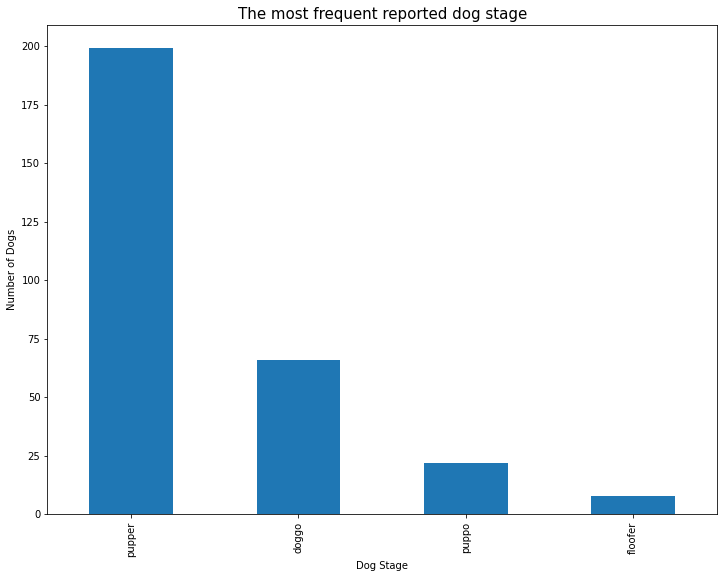

In [91]:
df['dog_stage'].value_counts()[1:5].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Dogs')
plt.title('The most frequent reported dog stage', size=15)
plt.xlabel('Dog Stage')
plt.savefig('The most frequent reported dog stage');

The pupper is the most frequent reporetd dog

#### 2.Analyzing number of tweets posted by WeRateDogs over time

In [92]:
df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    293
2015-12    359
2016-01    167
2016-02    109
2016-03    117
2016-04     53
2016-05     55
2016-06     78
2016-07     87
2016-08     55
2016-09     55
2016-10     55
2016-11     47
2016-12     52
2017-01     60
2017-02     61
2017-03     48
2017-04     41
2017-05     42
2017-06     44
2017-07     48
2017-08      2
Name: timestamp, dtype: int64

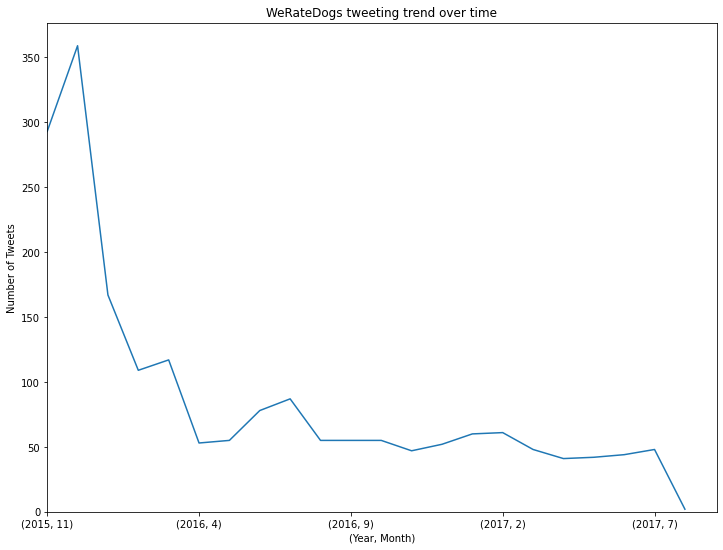

In [94]:
data = df.tweet_id.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count()
num_Tweets = data.plot(kind='line', title='WeRateDogs tweeting trend over time')
num_Tweets.set_xlabel("(Year, Month)")
num_Tweets.set_ylabel("Number of Tweets")
num_Tweets.set_ylim(0, )
num_Tweets.set_xlim(0, )
plt.savefig('num_Tweets')

Most tweets were posted in end of 2015 

#### 3.Number of dogs were rated above 10

In [108]:
df['rating_numerator'].value_counts().sum()

1928

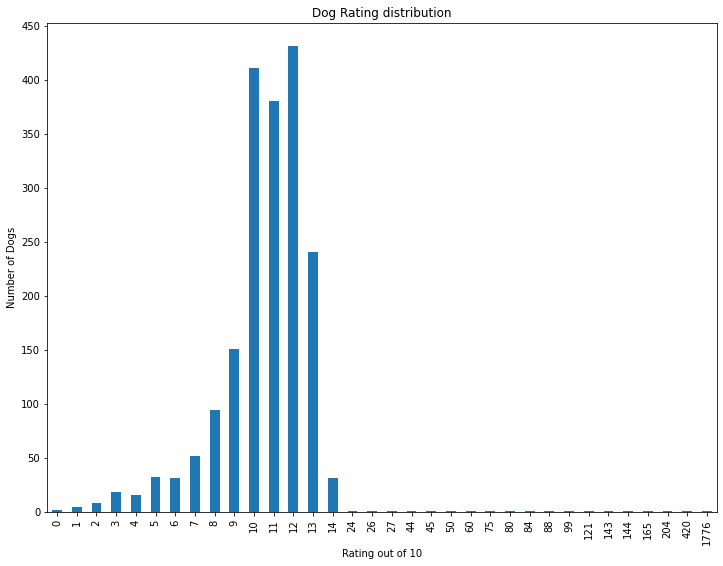

In [96]:
ax = df.rating_numerator.value_counts().sort_index().plot(kind ='bar', title = 'Dog Rating distribution')
ax.set_xlabel("Rating out of 10")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
plt.savefig('rating_dist')

In [97]:
print(sum (df['rating_numerator']>10),'dogs were rated above 10.')

1103 dogs were rated above 10.


####  4.The most used Twitter source

In [98]:
df['source'].value_counts()

Twitter for iPhone    1891
Twitter Web Client      26
TweetDeck               11
Name: source, dtype: int64

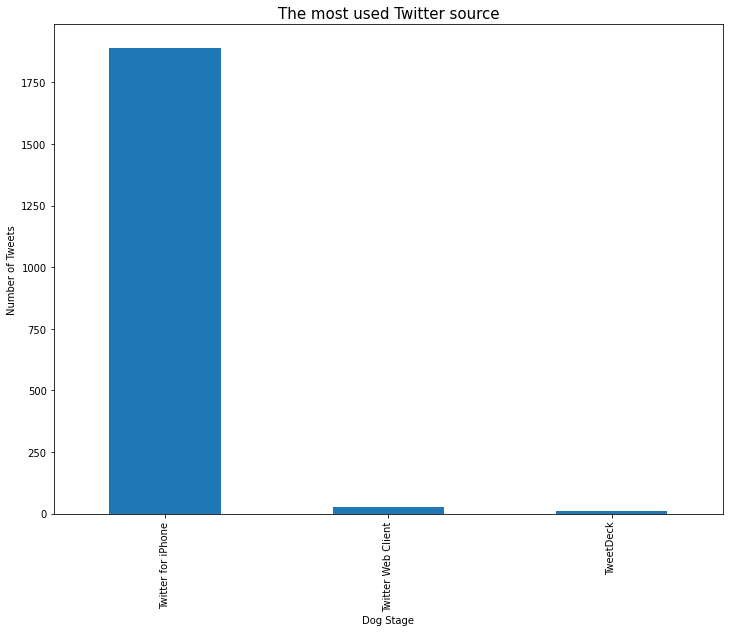

In [99]:
df['source'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Tweets')
plt.title('The most used Twitter source', size=15)
plt.xlabel('Dog Stage')
plt.savefig('The most used Twitter source');

The most popular source is Twitter for iPhone

#### 5.The top 10 most frequent predicted dog breeds

In [100]:
df['breed_prediction'].value_counts()[0:10]


Golden Retriever      143
Labrador Retriever    103
Pembroke               94
Chihuahua              87
Pug                    60
Toy Poodle             50
Chow                   45
Pomeranian             42
Samoyed                38
Malamute               32
Name: breed_prediction, dtype: int64

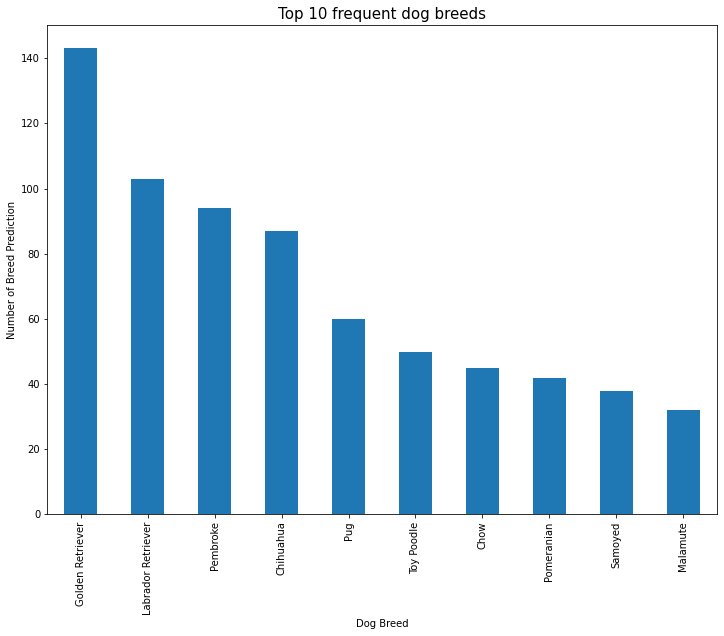

In [101]:
df['breed_prediction'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Breed Prediction')
plt.title('Top 10 frequent dog breeds', size=15)
plt.xlabel('Dog Breed')
plt.savefig('most_frequent_breed');

####  6.The top 10 most frequent dog names

In [102]:
df['name'].value_counts()[1:10].sort_values(ascending=False)

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Tucker      8
Penny       8
Sadie       8
Winston     8
Toby        7
Name: name, dtype: int64

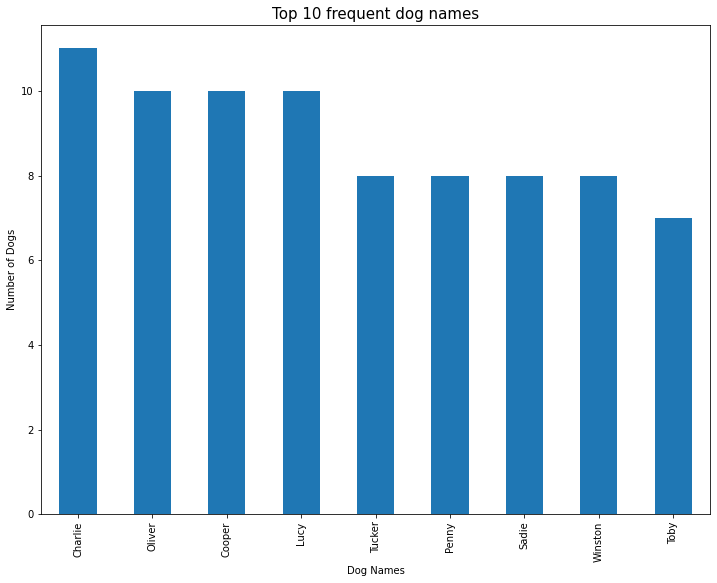

In [104]:
df['name'].value_counts()[1:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Dogs')
plt.title('Top 10 frequent dog names', size=15)
plt.xlabel('Dog Names')
plt.savefig('most_frequent_names');

#### 7.Analysis of retweet and favorite counts

In [105]:
print('%s\t%s' % ('Mean Retweet Count', round(df.retweet.mean())))
print('%s\t%s' % ('Mean Favorite Count', round(df.favorite.mean())))

Mean Retweet Count	2515
Mean Favorite Count	8296


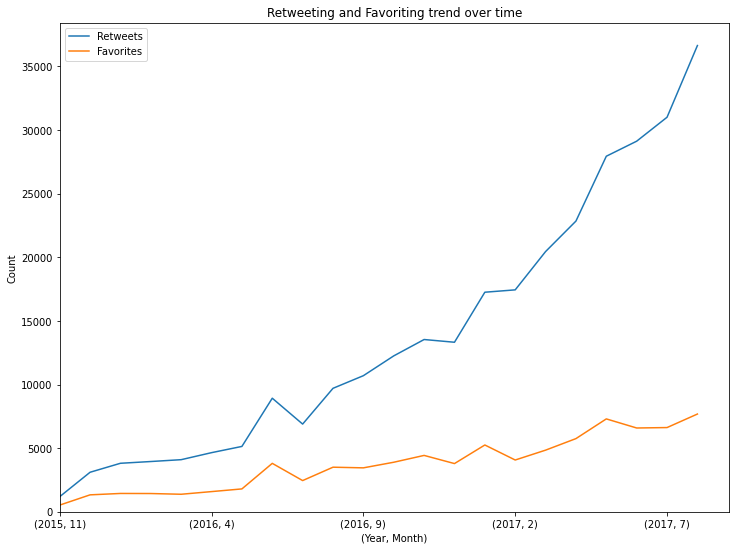

In [107]:
plt.subplots(1, sharex=True)
data1= df.retweet.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean()
data2= df.favorite.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean()
favo = data2.plot(kind='line')
ret = data1.plot(kind='line')
favo.set_xlim(0, )
ret.set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')